# **DevOps Jobs in the Greater Philadelphia Area**

## Objective
Analyze the job postings to determine:

1. Desired skills and experience.
2. Payscale for DevOps in this area.
3. What company has the most postings.
4. Areas outside of the city with the most postings.
5. Variations in job title.

## Understanding the Column Data
* Title: job title
* Company: name of company
* Salary: if a salary is listed, it is provided here
* Description: the job description / details of position

## **Code**

### Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
csv = '/content/drive/My Drive/datasets/indeed/devops.csv'
df = pd.read_csv(csv)
df.head()

,Title,Company,Location,Salary,Description
0,DevOps/ Cloud Engineer,Market Resource Partners (MRP),"Philadelphia, PA 19103 (Rittenhouse area)",None,At MRP we know it’s crucial that our people re...
1,DevOps Developer,RemX,"King of Prussia, PA 19406",None,Our client has an immediate need for a DevOps ...
2,Sr. Cloud/ DevOps Engineer,eNGINE,"Philadelphia, PA 19103 (Rittenhouse area)","$125,000 - $140,000 a year",eNGINE builds Technical Teams. We are a Soluti...
3,DevOps Engineer,Piper Companies,"Philadelphia, PA","$125,000 - $140,000 a year",Piper Companies is looking for a DevOps Engine...
4,DevOps Specialist-,Munich Re America,"Philadelphia, PA",None,We are adding to our diverse team of experts a...


## Job Titles

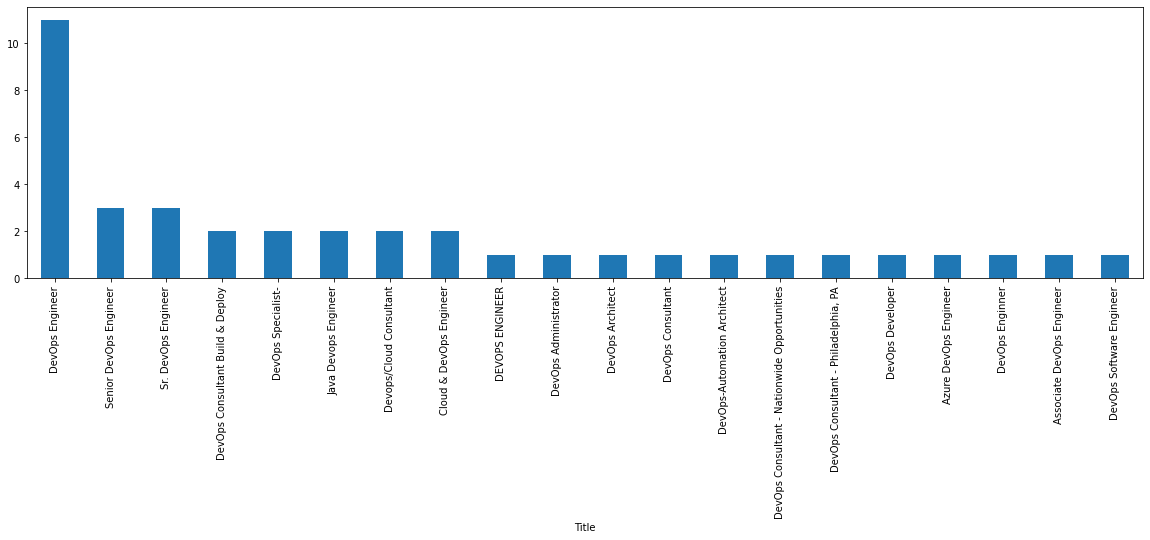

In [4]:
top_jobs = df.groupby("Title").count()["Location"].sort_values(ascending=False)[:20]
top_jobs.plot(kind="bar", figsize=(20,5))

## Companies

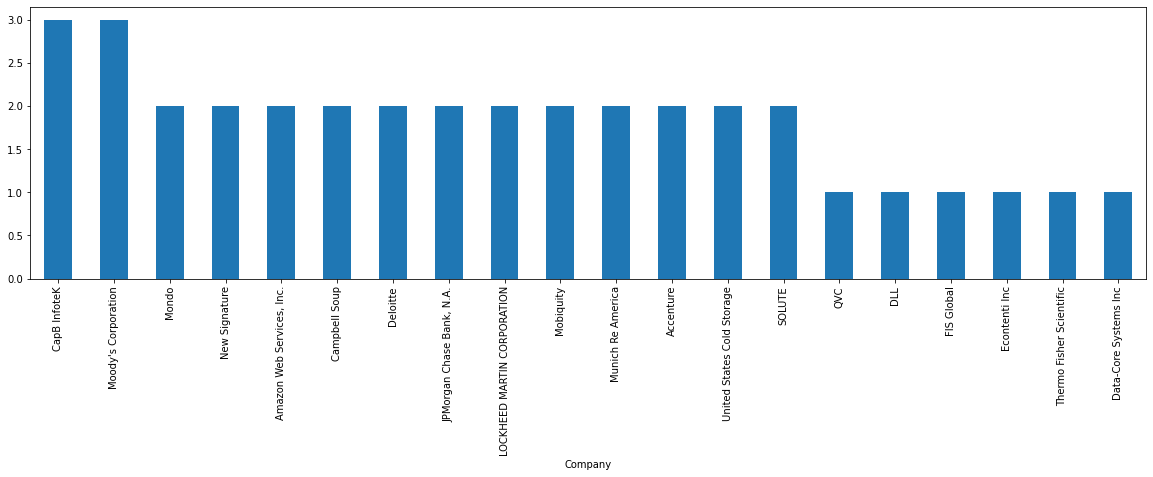

In [5]:
top_companies = df.groupby("Company").count()["Title"].sort_values(ascending=False)[:20]
top_companies.plot(kind="bar", figsize=(20,5))

## Locations

In [6]:
top_locations = df.groupby("Location").count()["Title"].sort_values(ascending=False)[:20]
top_locations

Location
Philadelphia, PA                                  16
Philadelphia, PA 19103 (Rittenhouse area)          5
West Chester, PA                                   4
Wilmington, DE                                     3
Wayne, PA 19087                                    3
Berwyn, PA                                         2
Camden, NJ                                         2
Camden, NJ 08103 (Central Waterfront area)         2
Camden, NJ 08103 (Gateway area)                    2
Collegeville, PA 19426                             2
Horsham, PA                                        2
King of Prussia, PA 19406                          2
Mount Laurel, NJ 08054                             2
Nether Providence Township, PA                     1
Philadelphia, PA 19019 (Somerton area)             1
Media, PA                                          1
Malvern, PA                                        1
Philadelphia, PA 19102 (City Center West area)     1
Philadelphia, PA 19103 (Logan Square 

## Salary

In [7]:
def format_salary(row):
    salary = row["Salary"]
    if "-" in salary:
        split = salary.split("-")
        salary_min = split[0]
        salary_max = split[1]
    else:
        salary_min = salary
        salary_max = salary
    
    row["salary_min"] = salary_min.replace("$","").replace("a month","").replace("a year","").replace(",","")
    row["salary_max"] = salary_max.replace("","").replace("a month","").replace("a year","").replace(",","")
       
    if "month" in row["Salary"]:
        row["salary_min"] = int(row["salary_min"])*12
        row["salary_max"] = int(row["salary_max"])*12
    
   
    return row


df_salary = df[df["Salary"]!= "None"].dropna()
df_salary = df_salary.apply(format_salary,axis=1) 

df_salary["salary_min"] = pd.to_numeric(df_salary["salary_min"],'coerce')
df_salary["salary_max"] = pd.to_numeric(df_salary["salary_max"],'coerce')

df_salary["salary_min"].mean()

61453.71428571428

In [8]:
top_munnies = df.groupby("Salary").count()["Title"].sort_values(ascending=False)[:20]
top_munnies

Salary
None                          55
$125,000 - $140,000 a year     2
$80,000 - $130,000 a year      1
$71 - $87 an hour              1
$55 - $60 an hour              1
$50 - $65 an hour              1
$100,000 - $140,000 a year     1
Name: Title, dtype: int64

## Desired Experience

In [9]:
def cleanData(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc]
    desc = [word for word in desc if word not in stop_words]
    return desc

In [10]:
stop_words = stopwords.words('english')
tags_df = df["Description"].apply(cleanData)
result = tags_df.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

### Cloud

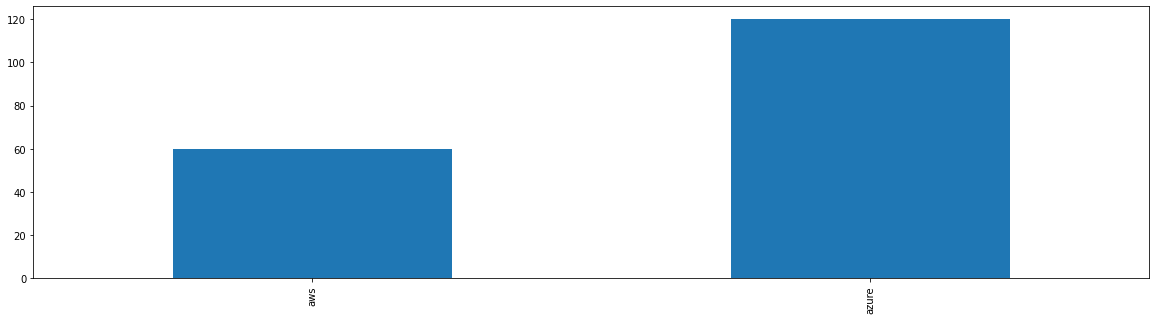

In [11]:
skills = ["aws","azure"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Programming, Scripting, and Markup Languages

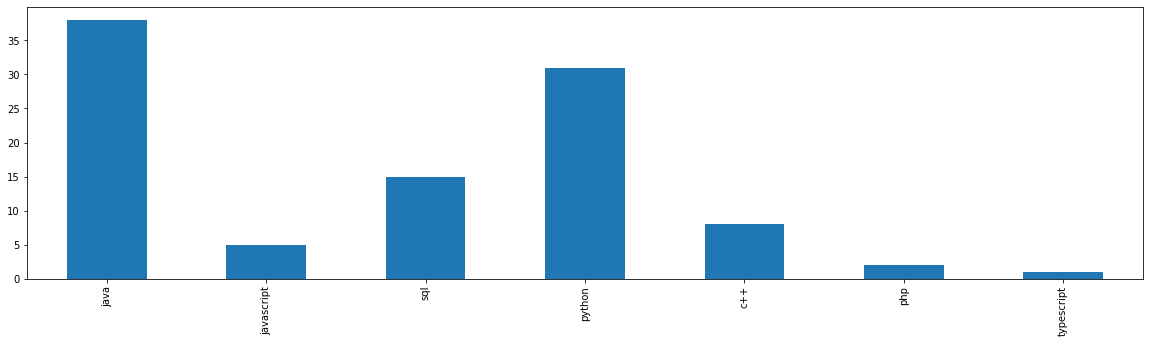

In [12]:
skills = ["java", "javascript", "c#", "sql", "python", "css", "html", "c++", "php", "typescript"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Web Frameworks

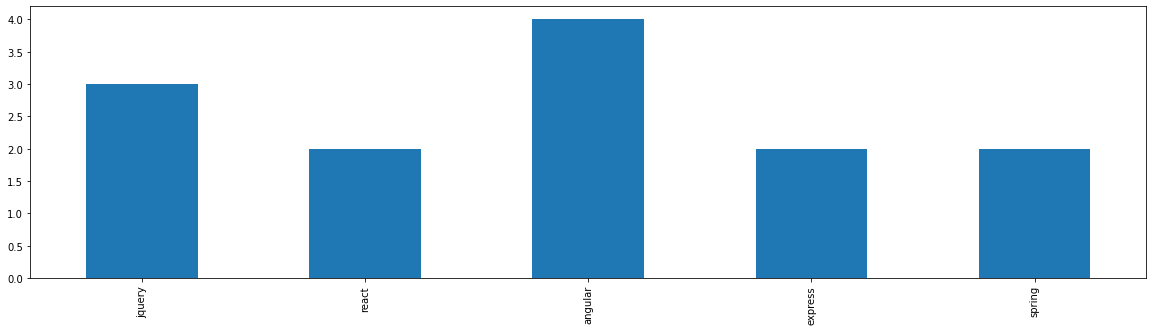

In [13]:
skills = ["jquery", "react", "angular", "asp.net", "express", "vue", "spring", "flask", "django", "laravel"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Frameworks, Libraries, and Tools

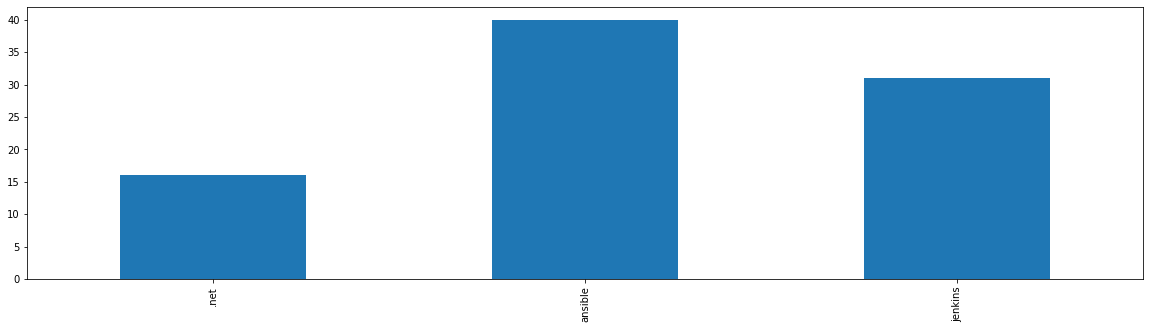

In [19]:
skills = ["node.js", ".net", "ansible", "teraform", "jenkins"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Databases

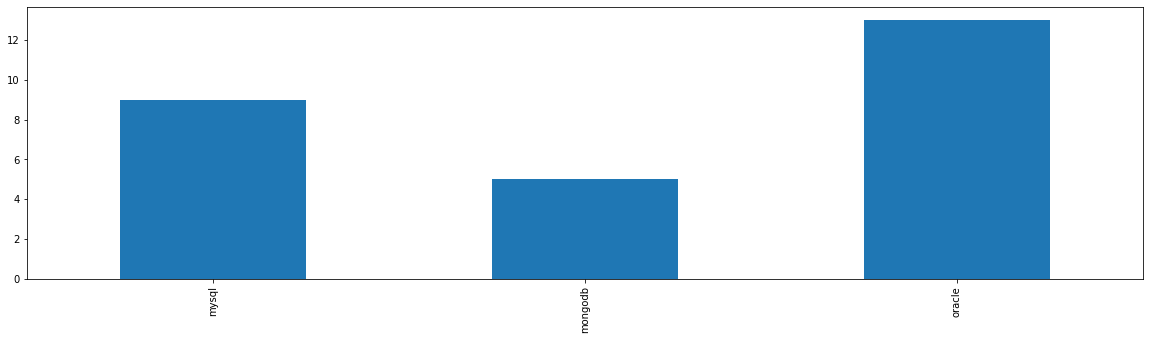

In [16]:
skills = ["mysql", "postgresql", "sqlite", "mongodb", "oracle"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Platforms

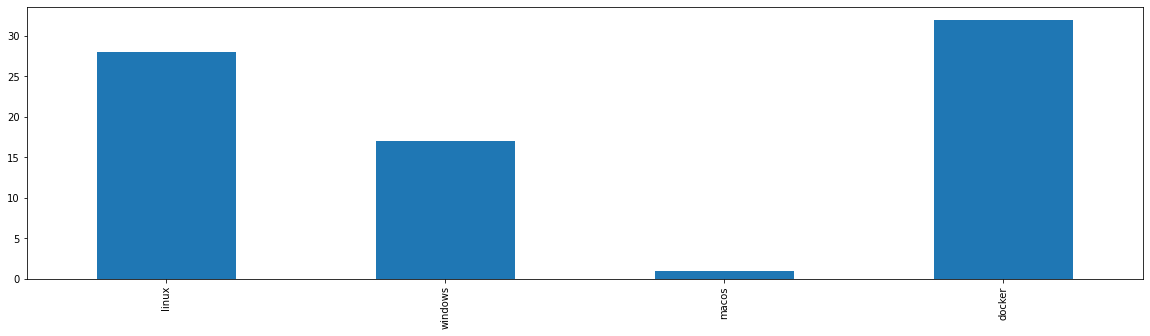

In [17]:
skills = ["linux", "windows", "macos", "docker"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

### Bash / Shell / PowerShell

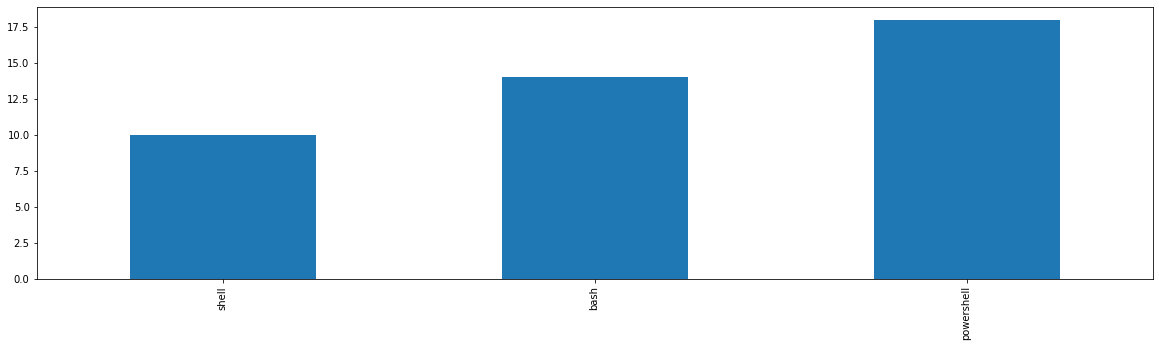

In [18]:
skills = ["shell", "bash", "powershell"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

## **Summary**
* Top Experience:
  * Cloud: Azure
  * Programming: Java & Python
  * Web Frameworks: Angular
  * Other Frameworks: Ansible
  * Database: Oracle
  * Platform: Docker & Linux
  * Scripting: PowerShell


* Top Money Stats:
  * Average salary for DevOps is $61453.71

  * The most common pay range is 125,000 - $140,000 a year

* Top Companies:
  * CapB Infotek & Moody's Corporation has the most job openings
  * The top industries seem to be Finance and Tech

* Top Locations:
  * Philadelphia, PA  
  * West Chester, PA
  * NJ

* Top Positions:
  * DevOps Engineer
  * Senior DevOps Engineer

## **Conclusion**
DevOps Engineers / Developers should focus on the Windows Stack: Azure, PowerShell, etc. Suprisingly, contrary to Data Science and Software Engineering, Azure beat AWS in DevOps. The two primary languages to learn are Java and Python. Suprised to see that Teraform is not mentioned at all. Knowing a Web Framework such as Angular will also be beneficial.

DevOps Developers are somewhat underpaid in the Greater Philadelphia Area. The average base pay is lower than what Glassdoor provides (93,583) at $61,453.71. This figure could also be a problem with the dataset, as there are not many open DevOps positions in the Greater Philadelphia Area.

The top companies are CapB Infotek and Moody's Corporation. Industries seem to be pretty diverse, but common ones are Finance and Tech companies.

As for locations, the city of Philadelphia has the most jobs. There are not many jobs outside of the city. The top suburb is West Chester, PA.

The top detailed job titles are DevOps Engineer and Senior DevOps Engineer. I'm surprised to see that SRE did not make the list.